# Praktikum Bersama

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Business Understanding:

Tujuan: Membantu perusahaan pelayaran atau pihak terkait memahami faktor-faktor yang mempengaruhi keselamatan

penumpang, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.

Manfaat:

Memberikan insight untuk perbaikan sistem keselamatan di masa depan.

Dapat digunakan untuk pelatihan model prediksi pada kasus serupa di industri transportasi.

Output Model: Prediksi (O Tidak Selamat, 1 Selamat) untuk setiap penumpang berdasarkan fitur input.

Selanjutnya, kita akan membangun model neural network dengan 2 hidden layer menggunakan data ini.

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum13/data/titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


Pemeriksaan Missing Values (Data Kosong).

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


Visualisasi Distribusi dan Outlier pada Kolom Age

<Axes: >

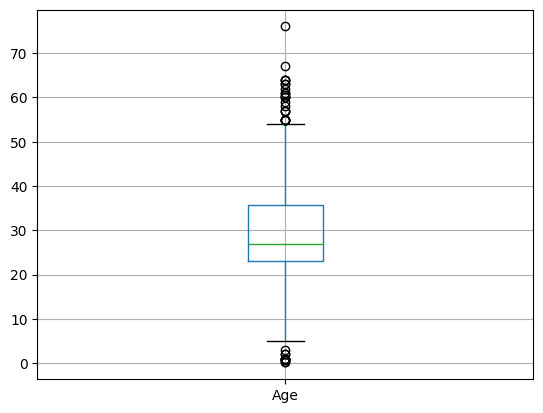

In [ ]:
df.boxplot(column='Age')

Split data variabel X dan Y

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

Transform Data

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

Train-test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42
)

Modelling – Menentukan Struktur Input untuk Neural Network

In [ ]:
X_train.shape

(334, 8)

In [ ]:
X_train.shape[1]

8

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Kompilasi Model dan Ringkasan Arsitektur (Model Summary)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

Training Model Neural Network

In [ ]:
history = model.fit(
X_train,
y_train,
epochs=50,
batch_size=32,
validation_split=0.2,
verbose=1

)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5383 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6178 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6217 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6301 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6443 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6444 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6307 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6802 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

 Evaluasi Model (Testing Data)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Loss pada data uji: {loss:.2f}")
print(f"Akurasi pada data uji: {accuracy:.2f}")

Loss pada data uji: nan
Akurasi pada data uji: 0.60


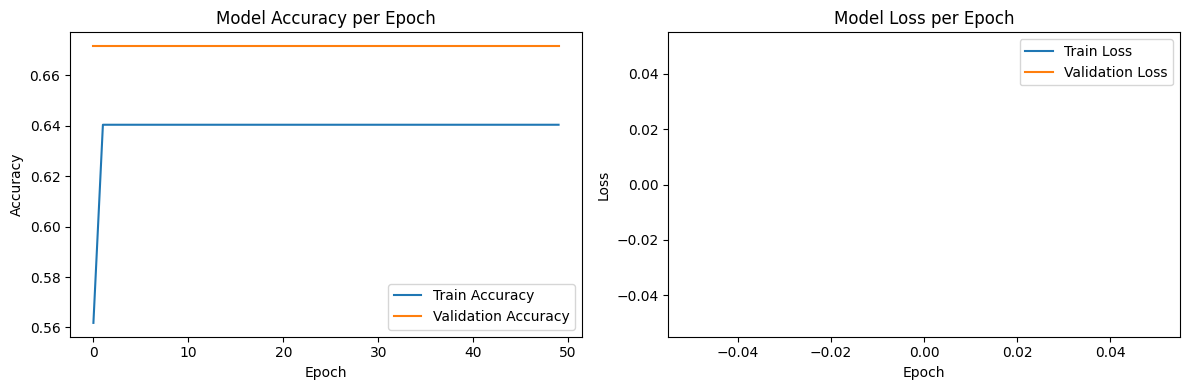

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Visualisasi Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Praktikum Mandiri

Import Kaggle

In [36]:
!pip install kaggle

In [37]:
kaggle='/content/kaggle.json'

In [38]:
!mkdir -p ~/.kaggle
!cp $kaggle ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [39]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [40]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [41]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [42]:
len(data_0)

2236

Prepocessing Data

In [43]:
import numpy as np
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. LOADING & LABELING DATA (DENGAN PERBAIKAN WARNA)
X = []
y = []
all_data = [data_0, data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9]

print("Sedang memproses gambar...")
for label, data_list in enumerate(all_data):
    for file_name in data_list:
        img_path = f'/content/dataset/{label}/{file_name}'
        try:
            # Buka, grayscale, dan resize ke 28x28
            img = Image.open(img_path).convert('L').resize((28, 28))

            # PENTING: Inversi warna (255 - pixel) agar background Hitam & tulisan Putih
            img_array = 255 - np.array(img)

            X.append(img_array)
            y.append(label)
        except:
            continue

X = np.array(X)
y = np.array(y)

Sedang memproses gambar...


Normalisasi & Flattening

In [44]:
X = X.astype('float32') / 255.0  # Normalisasi ke rentang 0-1
X_flat = X.reshape(X.shape[0], 784)  # Flatten 2D ke 1D

Split Data (Train & Test)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

print(f"Data latih: {X_train.shape}")
print(f"Data uji: {X_test.shape}")

Data latih: (17244, 784)
Data uji: (4311, 784)


Membuat Model MLP (TensorFlow)

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
print("\nMemulai pelatihan model...")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Memulai pelatihan model...
Epoch 1/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4671 - loss: 1.6069 - val_accuracy: 0.7854 - val_loss: 0.6892
Epoch 2/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8262 - loss: 0.5735 - val_accuracy: 0.8689 - val_loss: 0.4225
Epoch 3/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8973 - loss: 0.3419 - val_accuracy: 0.8863 - val_loss: 0.3678
Epoch 4/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9312 - loss: 0.2319 - val_accuracy: 0.9077 - val_loss: 0.3089
Epoch 5/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9454 - loss: 0.1802 - val_accuracy: 0.9077 - val_loss: 0.3043
Epoch 6/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9535 - loss: 0.1437 - val_accuracy: 0.9091 - val_loss: 0.3176
Epoch 7/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9566 - loss: 0.1320 - val_accuracy: 0.9086 - val_loss: 0.3121
Epoch 8/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.96

Evaluasi Model pada Data Test

In [48]:
# Mengevaluasi performa model
print("\n--- HASIL EVALUASI ---")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi Model Akhir: {accuracy * 100:.2f}%")


--- HASIL EVALUASI ---
Akurasi Model Akhir: 91.83%


Analisis Detail Laporan Klasifikasi

In [49]:
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       392
           1       0.94      0.97      0.95       489
           2       0.94      0.94      0.94       467
           3       0.92      0.91      0.91       446
           4       0.92      0.87      0.89       426
           5       0.93      0.94      0.93       419
           6       0.86      0.94      0.90       432
           7       0.95      0.92      0.93       402
           8       0.93      0.84      0.88       427
           9       0.85      0.90      0.87       411

    accuracy                           0.92      4311
   macro avg       0.92      0.92      0.92      4311
weighted avg       0.92      0.92      0.92      4311



Prediksi Gambar Secara Acak

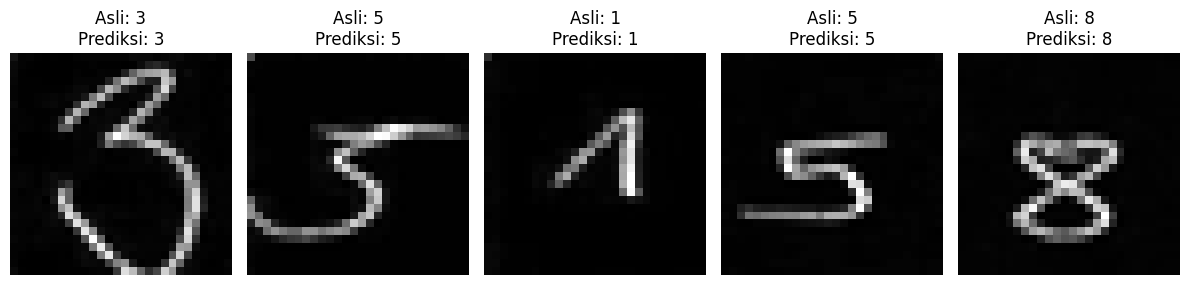

In [51]:
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    # Tampilkan gambar (reshape balik ke 28,28 untuk visualisasi)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Asli: {y_test[i]}\nPrediksi: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()